In [1]:
from math import sqrt
from scipy.stats import chi2_contingency
import pandas as pd

bookings_file = r'/home/beastman/Projects/HomeSchool/data-analysis/BehavioralDataAnalysis/Chapter 4 - Building Causal Diagrams From Scratch/chap4-hotel_booking_case_study.csv'
bookings = pd.read_csv(bookings_file)

bookings.head()

,NRDeposit,IsCanceled,DistributionChannel,MarketSegment,CustomerType,Children,ADR,PreviousCancellations,IsRepeatedGuest,Country,Quarter,Year
0,0,0,Direct,Direct,Transient,0,0.0,0,0,PRT,Q3,2015
1,0,0,Direct,Direct,Transient,0,0.0,0,0,PRT,Q3,2015
2,0,0,Direct,Direct,Transient,0,75.0,0,0,GBR,Q3,2015
3,0,0,Corporate,Corporate,Transient,0,75.0,0,0,GBR,Q3,2015
4,0,0,TA/TO,Online TA,Transient,0,98.0,0,0,GBR,Q3,2015


In [2]:
table_cnt = bookings.groupby(['NRDeposit','IsCanceled']).agg(cnt = ('Country', lambda x: len(x)))

table_cnt

cnt
NRDeposit IsCanceled       
0         0           63316
          1           23042
1         0              55
          1             982

In [3]:
table_pct = table_cnt.groupby(level=0).apply(lambda x: 100 * x/float(x.iloc[:,0].sum())).droplevel(0)

table_pct

cnt
NRDeposit IsCanceled           
0         0           73.318048
          1           26.681952
1         0            5.303761
          1           94.696239

<Axes: >

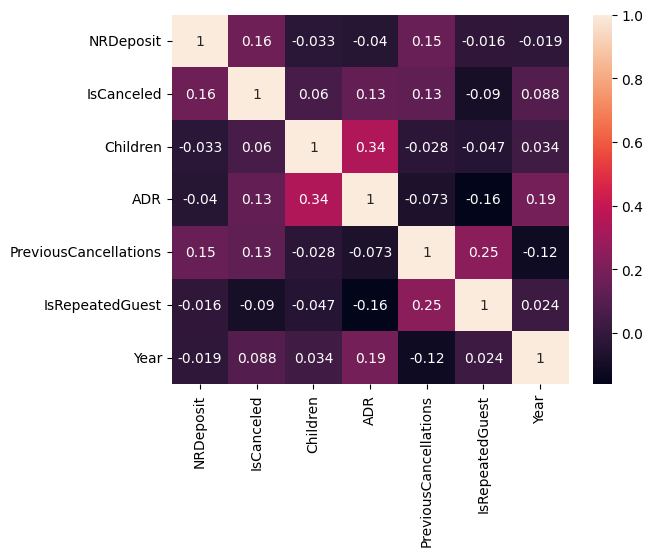

In [11]:
import seaborn as sns

num = bookings.copy().select_dtypes('number')
cat = bookings.copy().select_dtypes('object')

corr_df = num.corr()

sns.heatmap(corr_df, annot=True)